In [1]:
%matplotlib inline

import os
import sys

try:
    current_path=os.path.dirname(os.path.realpath(__file__))
except NameError:
    current_path=os.getcwd()

for i in range(3):
    sys.path.append(current_path)
    current_path=os.path.dirname(current_path)

from param_global import *
sys.path.append(pre_processing_path)
from Read_Preprocess_data import data,plot_images
import random

Using TensorFlow backend.


In [2]:
with open(os.path.join(sample_data_path,'sample_data_object.p'), 'rb') as handle:
    sample_data_object=pickle.load(handle)


In [37]:
def get_g_Data_for_Autoencoder(data_object):
    X_list=[(data_object[index].g_image_resized_reshaped)/data_object[index].g_image_resized_reshaped.max() for index in range(len(data_object))]
    return np.asarray(X_list),np.asarray(X_list)

In [38]:
X,y=get_g_Data_for_Autoencoder(sample_data_object)

In [53]:
# Keras model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(128, 128, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
print("1st Convolutional layer shape",x.shape)
x = MaxPooling2D((2, 2), padding='same')(x)
print("1st Maxpooling layer shape",x.shape)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
print("2nd Convolutional layer shape",x.shape)
x = MaxPooling2D((2, 2), padding='same')(x)
print("2nd Maxpooling layer shape",x.shape)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
print("3rd Convolutional layer shape",x.shape)
encoded = MaxPooling2D((2, 2), padding='same')(x)
print("Encoding layer shape",x.shape)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

1st Convolutional layer shape (?, 128, 128, 16)
1st Maxpooling layer shape (?, 64, 64, 16)
2nd Convolutional layer shape (?, 64, 64, 8)
2nd Maxpooling layer shape (?, 32, 32, 8)
3rd Convolutional layer shape (?, 32, 32, 8)
Encoding layer shape (?, 32, 32, 8)


In [54]:
X = X.astype('float32')
y = y.astype('float32') 

In [55]:
X_train=X[0:int(len(X)*2/3)]
X_test=X[int(len(X)*2/3):]

In [56]:
autoencoder.fit(X_train, X_train,
                epochs=30,
                batch_size=10,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 35 samples, validate on 18 samples
Epoch 1/30
35/35 [==============================] - 1s - loss: 0.6912 - val_loss: 0.6871
Epoch 2/30
35/35 [==============================] - 1s - loss: 0.6840 - val_loss: 0.6748
Epoch 3/30
35/35 [==============================] - 0s - loss: 0.6650 - val_loss: 0.6276
Epoch 4/30
35/35 [==============================] - 1s - loss: 0.5673 - val_loss: 0.3006
Epoch 5/30
35/35 [==============================] - 0s - loss: 0.1627 - val_loss: 0.0559
Epoch 6/30
35/35 [==============================] - 1s - loss: 0.0612 - val_loss: 0.0502
Epoch 7/30
35/35 [==============================] - 0s - loss: 0.0559 - val_loss: 0.0468
Epoch 8/30
35/35 [==============================] - 1s - loss: 0.0518 - val_loss: 0.0446
Epoch 9/30
35/35 [==============================] - 0s - loss: 0.0495 - val_loss: 0.0430
Epoch 10/30
35/35 [==============================] - 0s - loss: 0.0479 - val_loss: 0.0419
Epoch 11/30
35/35 [==============================] - 0s - loss: 0

In [57]:
decoded_imgs = autoencoder.predict(X_train)

In [58]:
X_train.max()

1.0

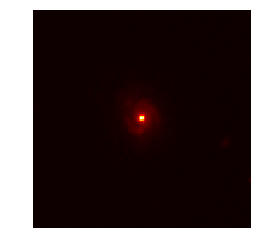

In [68]:
plot_images([X_train[10].reshape(decoded_imgs[1].shape[0],decoded_imgs[1].shape[1])])

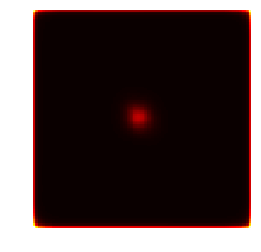

In [69]:
plot_images([decoded_imgs[10].reshape(decoded_imgs[1].shape[0],decoded_imgs[1].shape[1])])

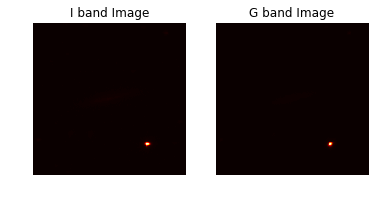

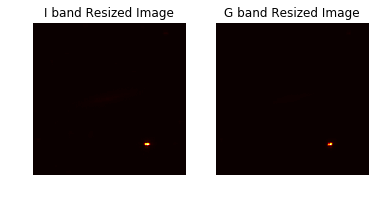

In [20]:
sample_data_object[20].plot_image()